<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(2_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_2.8_n250.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.152282,63.164964,67.398073,-167.178545,62.536774,215.867511,-153.330738
1,0.0,1.0,55.128700,66.514058,30.493663,257.128126,419.264546,213.466558,205.797988
2,0.0,2.0,57.776035,60.827440,69.627291,-197.385259,0.845508,113.051061,-112.205553
3,0.0,3.0,39.616906,45.877523,44.916352,-154.911800,-14.501019,120.080663,-134.581682
4,0.0,4.0,32.852253,25.285218,26.785110,20.982499,115.905081,142.224020,-26.318940
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,63.310516,95.926046,82.373758,-782.661898,-531.051577,29.897187,-560.948765
19996,999.0,16.0,51.688718,28.290576,41.023706,78.914114,209.917115,294.743522,-84.826407
19997,999.0,17.0,35.981718,85.418884,39.872934,69.895504,241.169039,337.026462,-95.857423
19998,999.0,18.0,78.156784,43.537790,40.170361,-25.681786,146.183150,144.709595,1.473555


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.152282,63.164964,67.398073,-167.178545,62.536774,215.867511,-153.330738
1,0.0,1.0,55.128700,66.514058,30.493663,257.128126,419.264546,213.466558,205.797988
2,0.0,2.0,57.776035,60.827440,69.627291,-197.385259,0.845508,113.051061,-112.205553
3,0.0,3.0,39.616906,45.877523,44.916352,-154.911800,-14.501019,120.080663,-134.581682
4,0.0,4.0,32.852253,25.285218,26.785110,20.982499,115.905081,142.224020,-26.318940
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,63.310516,95.926046,82.373758,-782.661898,-531.051577,29.897187,-560.948765
19996,999.0,16.0,51.688718,28.290576,41.023706,78.914114,209.917115,294.743522,-84.826407
19997,999.0,17.0,35.981718,85.418884,39.872934,69.895504,241.169039,337.026462,-95.857423
19998,999.0,18.0,78.156784,43.537790,40.170361,-25.681786,146.183150,144.709595,1.473555


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    89.152282  63.164964  67.398073 -167.178545   62.536774   
      1.0    55.128700  66.514058  30.493663  257.128126  419.264546   
      2.0    57.776035  60.827440  69.627291 -197.385259    0.845508   
      3.0    39.616906  45.877523  44.916352 -154.911800  -14.501019   
      4.0    32.852253  25.285218  26.785110   20.982499  115.905081   
...                ...        ...        ...         ...         ...   
999.0 15.0   63.310516  95.926046  82.373758 -782.661898 -531.051577   
      16.0   51.688718  28.290576  41.023706   78.914114  209.917115   
      17.0   35.981718  85.418884  39.872934   69.895504  241.169039   
      18.0   78.156784  43.537790  40.170361  -25.681786  146.183150   
      19.0   62.588775  85.839785  68.293865 -229.574729   -2.852305   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    215.867511 -153.330738  
      1.0    213.466558  205.797988  
      2.0    113.051061 -112.205553  
      3.0    120.080663 -134.581682  
      4.0    142.224020  -26.318940  
...                 ...         ...  
999.0 15.0    29.897187 -560.948765  
      16.0   294.743522  -84.826407  
      17.0   337.026462  -95.857423  
      18.0   144.709595    1.473555  
      19.0    92.533965  -95.386270  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    89.152282  63.164964  67.398073 -167.178545   62.536774   
      1.0    55.128700  66.514058  30.493663  257.128126  419.264546   
      2.0    57.776035  60.827440  69.627291 -197.385259    0.845508   
      3.0    39.616906  45.877523  44.916352 -154.911800  -14.501019   
      4.0    32.852253  25.285218  26.785110   20.982499  115.905081   
...                ...        ...        ...         ...         ...   
999.0 15.0   63.310516  95.926046  82.373758 -782.661898 -531.051577   
      16.0   51.688718  28.290576  41.023706   78.914114  209.917115   
      17.0   35.981718  85.418884  39.872934   69.895504  241.169039   
      18.0   78.156784  43.537790  40.170361  -25.681786  146.183150   
      19.0   62.588775  85.839785  68.293865 -229.574729   -2.852305   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    215.867511 -153.330738  
      1.0    213.466558  205.797988  
      2.0    113.051061 -112.205553  
      3.0    120.080663 -134.581682  
      4.0    142.224020  -26.318940  
...                 ...         ...  
999.0 15.0    29.897187 -560.948765  
      16.0   294.743522  -84.826407  
      17.0   337.026462  -95.857423  
      18.0   144.709595    1.473555  
      19.0    92.533965  -95.386270  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.152282,63.164964,67.398073,-167.178545,62.536774,215.867511,-153.330738
1,0.0,1.0,55.128700,66.514058,30.493663,257.128126,419.264546,213.466558,205.797988
2,0.0,2.0,57.776035,60.827440,69.627291,-197.385259,0.845508,113.051061,-112.205553
3,0.0,3.0,39.616906,45.877523,44.916352,-154.911800,-14.501019,120.080663,-134.581682
4,0.0,4.0,32.852253,25.285218,26.785110,20.982499,115.905081,142.224020,-26.318940
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,63.310516,95.926046,82.373758,-782.661898,-531.051577,29.897187,-560.948765
19996,999.0,16.0,51.688718,28.290576,41.023706,78.914114,209.917115,294.743522,-84.826407
19997,999.0,17.0,35.981718,85.418884,39.872934,69.895504,241.169039,337.026462,-95.857423
19998,999.0,18.0,78.156784,43.537790,40.170361,-25.681786,146.183150,144.709595,1.473555


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    89.152282  63.164964  67.398073 -167.178545   62.536774   
      1.0    55.128700  66.514058  30.493663  257.128126  419.264546   
      2.0    57.776035  60.827440  69.627291 -197.385259    0.845508   
      3.0    39.616906  45.877523  44.916352 -154.911800  -14.501019   
      4.0    32.852253  25.285218  26.785110   20.982499  115.905081   
...                ...        ...        ...         ...         ...   
999.0 15.0   63.310516  95.926046  82.373758 -782.661898 -531.051577   
      16.0   51.688718  28.290576  41.023706   78.914114  209.917115   
      17.0   35.981718  85.418884  39.872934   69.895504  241.169039   
      18.0   78.156784  43.537790  40.170361  -25.681786  146.183150   
      19.0   62.588775  85.839785  68.293865 -229.574729   -2.852305   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    215.867511 -153.330738  
      1.0    213.466558  205.797988  
      2.0    113.051061 -112.205553  
      3.0    120.080663 -134.581682  
      4.0    142.224020  -26.318940  
...                 ...         ...  
999.0 15.0    29.897187 -560.948765  
      16.0   294.743522  -84.826407  
      17.0   337.026462  -95.857423  
      18.0   144.709595    1.473555  
      19.0    92.533965  -95.386270  

[20000 rows x 7 columns]

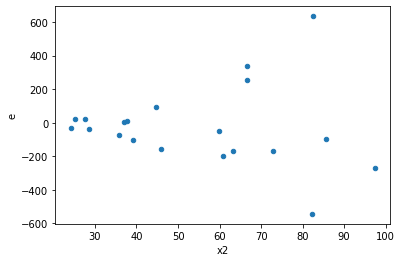

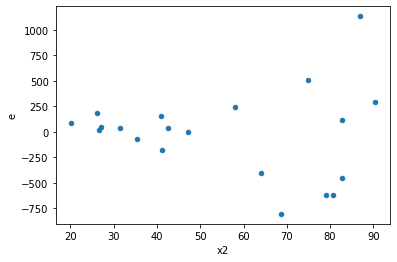

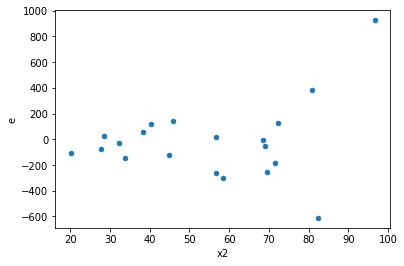

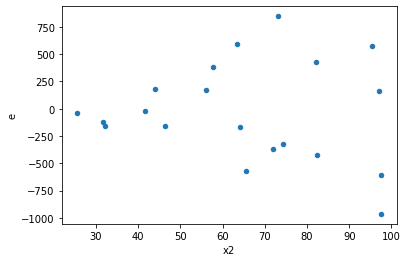

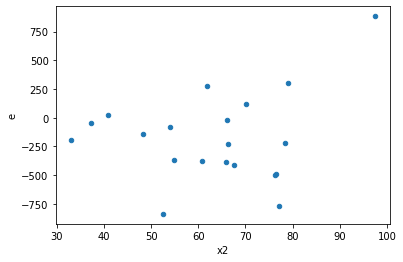

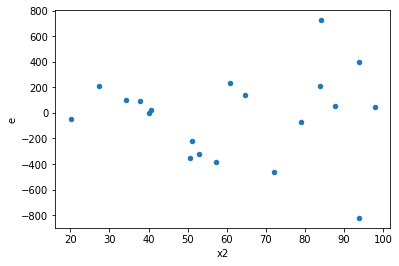

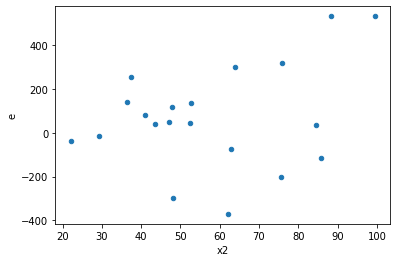

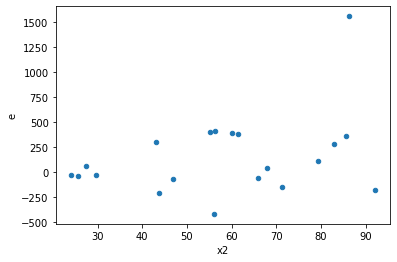

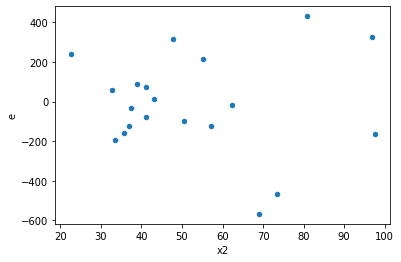

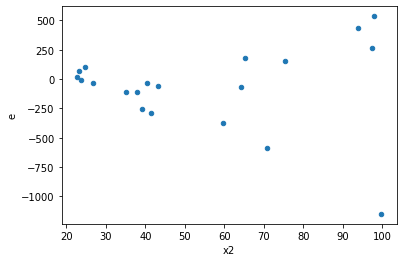

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,24099.695153707155,636027.8404080955,4819.9390307414305,127205.5680816191,26.391530529806644,0.0026594109983688607,0.9986702945008156,0.0013297054991844304,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,839675.2499757839,1150058.3981209313,167935.04999515676,230011.67962418628,1.3696466558399798,0.7383894561990398,0.6308052719004801,0.3691947280995199,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,11648.469097276056,538796.6721579911,2329.6938194552113,107759.33443159822,46.254719625258424,0.0006918263773656452,0.9996540868113172,0.0003459131886828226,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,311084.15109885164,712250.910705737,62216.83021977033,142450.18214114738,2.28957633550225,0.3844240822310623,0.8077879588844689,0.19221204111553114,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,107834.6521874686,187978.6479137703,21566.93043749372,37595.729582754066,1.7432118906172465,0.5567517026989264,0.7216241486505368,0.2783758513494632,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,68813.72582653958,1244836.1580540333,13762.745165307915,248967.23161080666,18.08993980636831,0.006444610082645852,0.9967776949586771,0.003222305041322926,Reject005=0 : Heteroscedasticity
9.0,5.0,5.0,321448.0078461056,597331.258979871,64289.60156922112,119466.25179597421,1.8582515504835406,0.5129095977250431,0.7435452011374785,0.25645479886252154,Reject005=1 : Homoscedasticity
12.0,5.0,5.0,39686.15725677438,507254.75092965364,7937.231451354875,101450.95018593073,12.781654511109561,0.014228161493200941,0.9928859192533995,0.007114080746600471,Reject005=0 : Heteroscedasticity
13.0,5.0,5.0,369494.09363941796,1191129.3162850253,73898.8187278836,238225.86325700505,3.2236762015671756,0.22475488173651947,0.8876225591317403,0.11237744086825974,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,24099.695153707155,636027.8404080955,4819.9390307414305,127205.5680816191,26.391530529806644,0.0026594109983688607,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,839675.2499757839,1150058.3981209313,167935.04999515676,230011.67962418628,1.3696466558399798,0.7383894561990398,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,11648.469097276056,538796.6721579911,2329.6938194552113,107759.33443159822,46.254719625258424,0.0006918263773656452,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,2022145.9665137785,274561.1008098995,404429.1933027557,54912.2201619799,0.13577709292828574,0.04697234401971896,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,311084.15109885164,712250.910705737,62216.83021977033,142450.18214114738,2.28957633550225,0.3844240822310623,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,471785.33657862694,103557.84652663753,94357.06731572539,20711.569305327506,0.21950204573468923,0.12157202833031082,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,107834.6521874686,187978.6479137703,21566.93043749372,37595.729582754066,1.7432118906172465,0.5567517026989264,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,68813.72582653958,1244836.1580540333,13762.745165307915,248967.23161080666,18.08993980636831,0.006444610082645852,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,236182.30096139,9275.986491841082,47236.460192278,1855.1972983682165,0.03927468931449473,0.0028951414799407087,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      721
Reject005=0 : Heteroscedasticity    279
Name: Result_test, dtype: int64